<a href="https://colab.research.google.com/github/Amaz17/Data/blob/main/Fotos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow import keras
import tensorflow as tf
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os


from google.colab import drive
drive.mount('/content/drive', force_remount=True)

entrena = "/content/drive/MyDrive/Data_Fotos/TRAIN"


Mounted at /content/drive


In [3]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
 
datos_folder_path="/content/drive/MyDrive/Data_Fotos/TRAIN/Balones"
Balones=[]
img_size=150
for img in os.listdir(datos_folder_path):
    img = cv2.imread(os.path.join(datos_folder_path,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    Balones.append(img_resize)

In [4]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
 
datos_folder_path="/content/drive/MyDrive/Data_Fotos/TRAIN/carros"
carros=[]
img_size=150
for img in os.listdir(datos_folder_path):
    img = cv2.imread(os.path.join(datos_folder_path,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    carros.append(img_resize)

In [5]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
 
datos_folder_path="/content/drive/MyDrive/Data_Fotos/TRAIN/gorras"
gorras=[]
img_size=150
for img in os.listdir(datos_folder_path):
    img = cv2.imread(os.path.join(datos_folder_path,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    gorras.append(img_resize)

In [6]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
 
datos_folder_path="/content/drive/MyDrive/Data_Fotos/TRAIN/MOCHILA"
MOCHILA=[]
img_size=150
for img in os.listdir(datos_folder_path):
    img = cv2.imread(os.path.join(datos_folder_path,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    MOCHILA.append(img_resize)

In [7]:
MOCHILA = np.array(MOCHILA)
print(MOCHILA.shape)
carros = np.array(carros)
print(carros.shape)
gorras = np.array(gorras)
print(gorras.shape)
Balones = np.array(Balones)
print(Balones.shape)


(40, 150, 150, 3)
(40, 150, 150, 3)
(41, 150, 150, 3)
(40, 150, 150, 3)


(150, 150, 3)


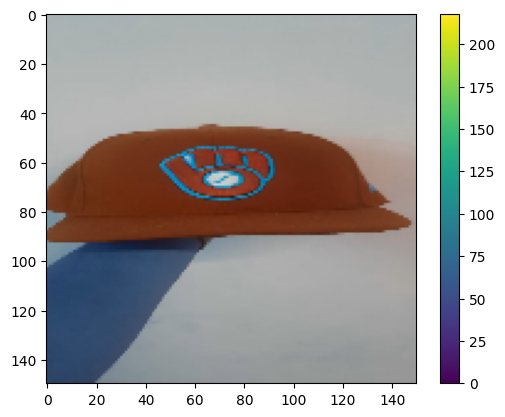

In [8]:
print(gorras[15].shape)
plt.figure()
plt.imshow(np.squeeze(gorras[15]))
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
images = np.concatenate([gorras, carros, Balones, MOCHILA])
print(len(images))
Images=np.array(images)


161


In [10]:
etiquetas_gorras=np.repeat(0,len(gorras))
print(len(etiquetas_gorras))
etiquetas_carros=np.repeat(1,len(carros))
print(len(etiquetas_carros))
etiquetas_balones=np.repeat(2,len(Balones))
print(len(etiquetas_balones))
etiquetas_mochilas=np.repeat(3,len(MOCHILA))
print(len(etiquetas_mochilas))


41
40
40
40


In [12]:
class_names=['gorras', 'carros', 'Balones', 'MOCHILA']

In [13]:
Labels=np.concatenate([etiquetas_gorras,etiquetas_carros,etiquetas_balones,etiquetas_mochilas])
print(len(Labels))
print(Labels)

161
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3]


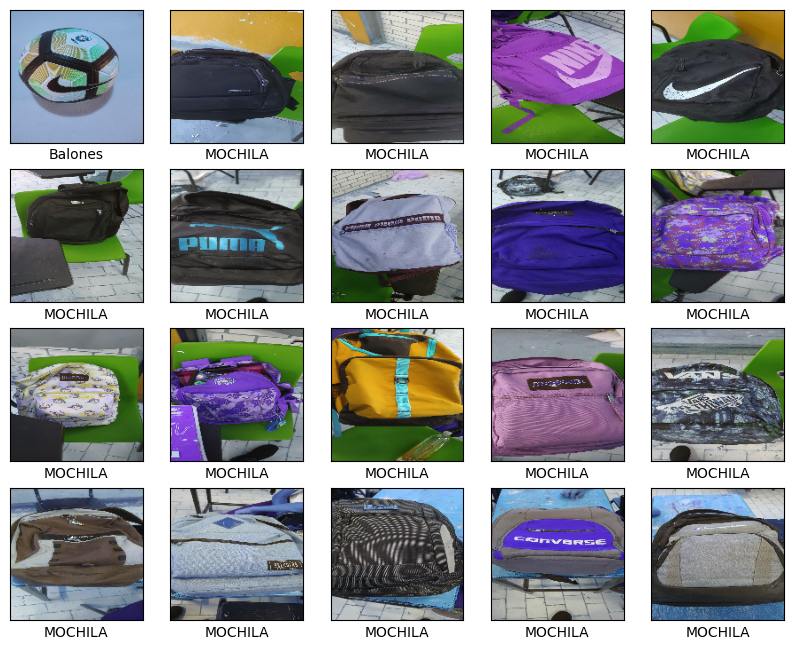

In [16]:
plt.figure(figsize=(10,10))
for i in range(120, 140):  # Mostrar imágenes desde la 120 hasta la 139
    plt.subplot(5,5,i-119)  # Restar 119 para obtener los índices correctos en el subplot
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Images[i])
    plt.xlabel(class_names[Labels[i]])
plt.show()


In [43]:
from __future__ import absolute_import, division, print_function, unicode_literals

variable_name = ""
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

from __future__ import absolute_import, division, print_function, unicode_literals


# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import tensorflow.keras.optimizers as Optimizer

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.12.0


In [46]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(150, 150,3)),
    keras.layers.Dense(128, activation='relu'),
    
    keras.layers.Dense(4, activation='softmax'),
    
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(Images, Labels, epochs=40)
trained=model.fit(Images, Labels, epochs=40)

Epoch 1/40
6/6 [==============================] - 1s 6ms/step - loss: 19684.6328 - accuracy: 0.1863
Epoch 2/40
6/6 [==============================] - 0s 6ms/step - loss: 10453.6182 - accuracy: 0.4037
Epoch 3/40
6/6 [==============================] - 0s 5ms/step - loss: 10343.2002 - accuracy: 0.3975
Epoch 4/40
6/6 [==============================] - 0s 5ms/step - loss: 6380.4619 - accuracy: 0.4224
Epoch 5/40
6/6 [==============================] - 0s 6ms/step - loss: 5725.5054 - accuracy: 0.4099
Epoch 6/40
6/6 [==============================] - 0s 6ms/step - loss: 2680.1179 - accuracy: 0.4907
Epoch 7/40
6/6 [==============================] - 0s 5ms/step - loss: 1984.0234 - accuracy: 0.5963
Epoch 8/40
6/6 [==============================] - 0s 5ms/step - loss: 1474.3593 - accuracy: 0.5155
Epoch 9/40
6/6 [==============================] - 0s 5ms/step - loss: 1584.6398 - accuracy: 0.6149
Epoch 10/40
6/6 [==============================] - 0s 5ms/step - loss: 585.1041 - accuracy: 0.7516
Epoch 1

In [55]:
img=Images[130]
#print(img.shape)
img=np.expand_dims(img,0)
#print(img.shape)

In [68]:
img=Images[150]
#print(img.shape)
img=np.expand_dims(img,0)
#print(img.shape)
predictions_single=model.predict(img)
print(predictions_single)

print(class_names[np.argmax(predictions_single)])



1/1 [==============================] - 0s 20ms/step
[[0. 0. 0. 1.]]
MOCHILA


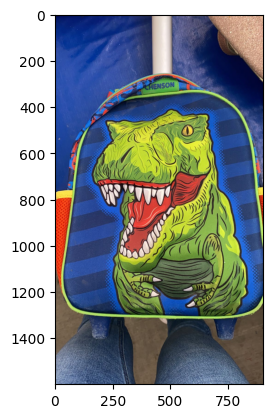

In [90]:
img=cv2.imread("/content/drive/MyDrive/Data_Fotos/TEST/MOCHILA/IMG-20230511-WA0069.jpg")
img_cvt=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

In [91]:
   img2=img_cvt
   img2= cv2.resize(img,(150,150))
   print(img2.shape)
   img2=np.expand_dims(img2,0)
   print(img2.shape)
predictions_single=model.predict(img2)
print(predictions_single)

print(class_names[np.argmax(predictions_single)])

(150, 150, 3)
(1, 150, 150, 3)
1/1 [==============================] - 0s 27ms/step
[[0.000000e+00 0.000000e+00 1.000000e+00 7.902924e-10]]
Balones
